In [1]:
import getpass
print(getpass.getuser())

achavez25


In [2]:
from qiskit import *

In [3]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

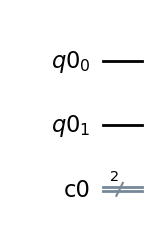

In [4]:
circuit.draw(output ='mpl')

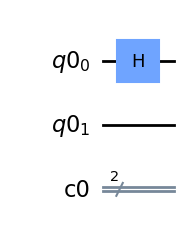

In [8]:
circuit.h(qr[0])
circuit.draw(output='mpl')

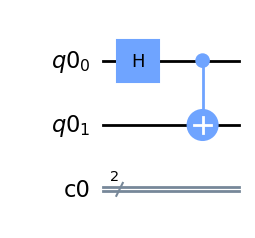

In [9]:
circuit.cx(qr[0], qr[1])
circuit.draw(output='mpl')

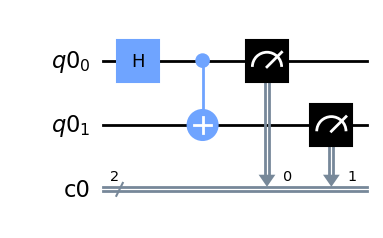

In [10]:
circuit.measure(qr,cr)
circuit.draw(output='mpl')

In [11]:
simulator = Aer.get_backend('qasm_simulator')

In [12]:
result = execute(circuit, backend=simulator, shots=1024).result()

In [13]:
from qiskit.tools.visualization import plot_histogram

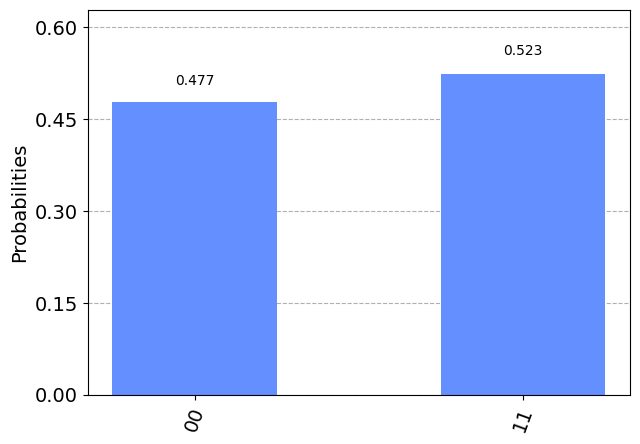

In [14]:
plot_histogram(result.get_counts(circuit))

In [16]:
counts = result.get_counts(circuit)
print(counts)

{'11': 536, '00': 488}


In [17]:
#IBMQ.save_account('d5a95c113e37c066d41c513ed67f656dbe36c76ef1c3624ac759974313372b3a2497720dca73e9c9239eb66fd6011085be1f79774a6744ec3743a1a129d89cba')
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [18]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-education', group='lamar-uni-1', project='misy-5315-livecl')>]

In [19]:
provider = IBMQ.get_provider(hub='ibm-q-education', group='lamar-uni-1', project='misy-5315-livecl')

In [20]:
provider.backends() ## This will show all the backends available to you

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-education', group='lamar-uni-1', project='misy-5315-livecl')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-education', group='lamar-uni-1', project='misy-5315-livecl')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-education', group='lamar-uni-1', project='misy-5315-livecl')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-education', group='lamar-uni-1', project='misy-5315-livecl')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-education', group='lamar-uni-1', project='misy-5315-livecl')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q-education', group='lamar-uni-1', project='misy-5315-livecl')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q-education', group='lamar-uni-1', project='misy-5315-livecl')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q-education', group='lamar-uni-1', project='misy-5315-livecl')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q-education', group='lamar-un

In [23]:
qcomp = provider.get_backend('ibm_perth')

In [26]:
job = execute(circuit, backend=qcomp, shots=1024)

In [27]:
from qiskit.tools.monitor import job_monitor

In [28]:
job_monitor(job)

Job Status: job has successfully run


In [29]:
result = job.result()

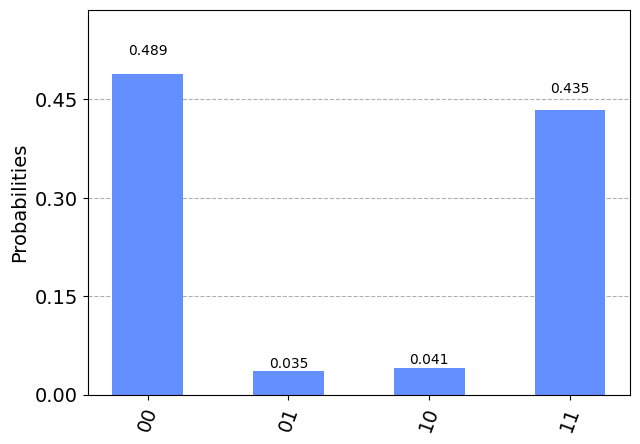

In [30]:
plot_histogram(result.get_counts(circuit))

In [31]:
counts = result.get_counts(circuit)
print(counts)

{'00': 501, '01': 36, '10': 42, '11': 445}
